# Logistic Regression

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
#warnings.filterwarnings('ignore')

import sys
sys.path.append('/Users/omojumiller/mycode/tools')

import numpy as np
import pandas as pd
import scipy.stats as st
from tools import plot_features_by_target


# Use CPickle if available
try:
   import cPickle as pickle
except:
   import pickle

# Graphing Libraries
import matplotlib.pyplot as pyplt
import seaborn as sns
sns.set_style("whitegrid")  

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

from IPython.display import display

In [112]:
import csv

# Load a CSV file
def load_csv(filename):
    file = open(filename, "r")
    lines = reader(file)
    dataset = list(lines)
    return dataset

In [99]:
fname = 'data/actors.csv'

In [159]:
with open(fname, 'rU') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    



In [186]:
import re

def get_col_types(row):
    """Get the number of numeric types and the rest"""
    num_of_numerics = 0

    i = 0
    num_index = []
    str_index = []
    for dp in row:
        if re.findall("[-+]?\d+[\.]?\d*[eE]?[-+]?\d*", dp):
            num_of_numerics += 1
            num_index.append(i)
            i += 1
        else:
            str_index.append(i)
            i += 1
                

    num_of_str = len(row) - num_of_numerics
    
    return dict(num_of_numerics=num_of_numerics, num_index=num_index,
         num_of_str=num_of_str, str_index=str_index)

In [197]:
get_col_types(row)

{'num_index': [1, 2, 3, 5],
 'num_of_numerics': 4,
 'num_of_str': 2,
 'str_index': [0, 4]}

In [196]:
my_dtypes['num_of_numerics']

4

In [201]:
import csv

num_lines = sum(1 for line in open(fname, 'rU'))


with open(fname, 'rU') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    header = csv_reader.next()
    row = csv_reader.next()
    my_dtypes = get_col_types(row)
    index = 0
    
    X = numpy.zeros(shape=(num_lines, my_dtypes['num_of_numerics']))
    X_str = []
    X[index] = [float(row[1]), float(row[2]), float(row[3]), float(row[5])]
    
    
    
    for row in csv_reader:
        X[index] = [float(row[1]), float(row[2]), float(row[3]), float(row[5])]
        index += 1

In [200]:
X

array([[ 4772.8,    69. ,    69.2,   623.4],
       [ 4468.3,    61. ,    73.3,   534.9],
       [ 4340.8,    44. ,    98.7,   415. ],
       ..., 
       [ 2416.5,    25. ,    96.7,   448.1],
       [    0. ,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. ,     0. ]])

In [39]:
df = pd.read_csv('data/actors.csv')

In [43]:
df.columns = ['Actor', 'TotalGross', 'NumberOfMovies', 'AveragePerMovie', 'Num1Movie', 'Gross']
df.head()

,Actor,TotalGross,NumberOfMovies,AveragePerMovie,Num1Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Actor              50 non-null object
TotalGross         50 non-null float64
NumberOfMovies     50 non-null int64
AveragePerMovie    50 non-null float64
Num1Movie          50 non-null object
Gross              50 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.4+ KB


In [48]:
x_vars = ['NumberOfMovies', 'AveragePerMovie', 'Gross']
y_vars=['TotalGross']

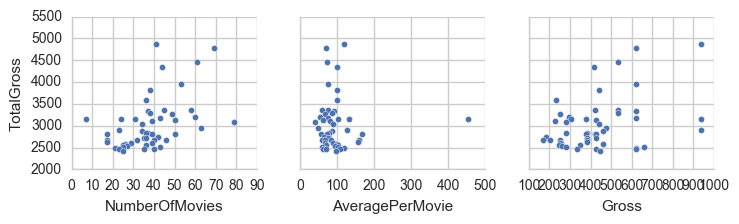

In [49]:
plot_features_by_target(df, x_vars, y_vars)

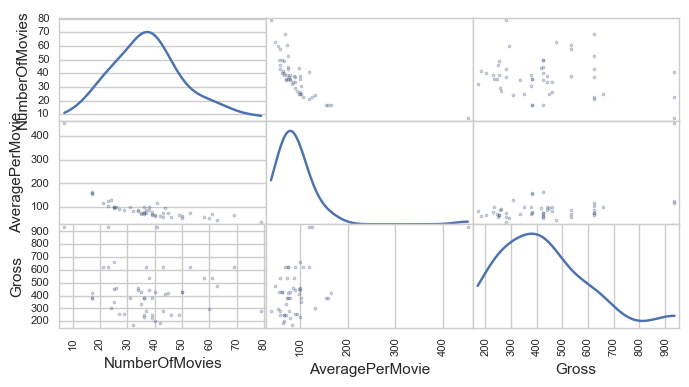

In [51]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df[x_vars], alpha = 0.3, figsize = (8,4), diagonal = 'kde');

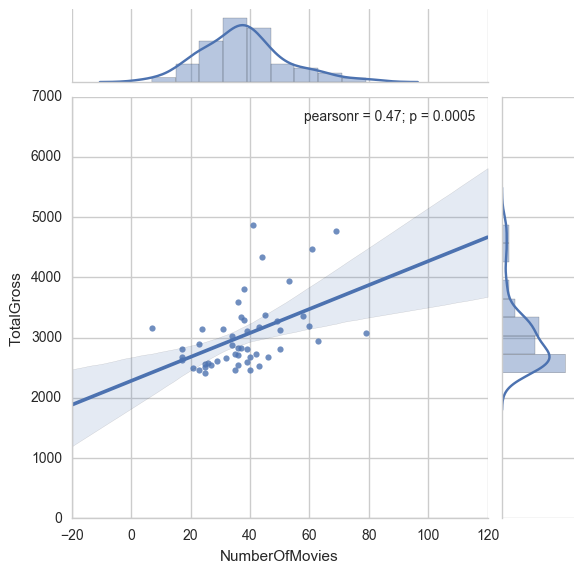

In [59]:
sns.jointplot(x='NumberOfMovies', y='TotalGross', data=df, kind='reg');

In [60]:
class LinearRegression():
    """Linear model for doing regression.
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If 
        false then we use batch optimization by least squares.
    """
    def __init__(self, n_iterations=100, learning_rate=0.001, gradient_descent=True):
        self.w = None
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent    # Opt. method. If False => Least squares

    def fit(self, X, y):
        # Insert constant ones as first column (for bias weights)
        X = np.insert(X, 0, 1, axis=1)
        # Get weights by gradient descent opt.
        if self.gradient_descent:
            n_features = np.shape(X)[1]
            # Initial weights randomly [0, 1]
            self.w = np.random.random((n_features, ))
            # Do gradient descent for n_iterations
            for _ in range(self.n_iterations):
                # Gradient of squared loss w.r.t the weights
                w_gradient = X.T.dot(X.dot(self.w) - y)
                # Move against the gradient to minimize loss
                self.w -= self.learning_rate * w_gradient
        # Get weights by least squares (by pseudoinverse)
        else:
            U, S, V = np.linalg.svd(X.T.dot(X))
            S = np.diag(S)
            X_sq_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self.w = X_sq_inv.dot(X.T).dot(y)

    def predict(self, X):
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

In [62]:
from sklearn.model_selection import train_test_split

def shuffle_split_data(X, y, num_train):
    """ Shuffles and splits data into 75% training and 25% testing subsets,
        then returns the training and testing subsets. """
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train, random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


In [80]:
X, y = df[x_vars], df[y_vars]

num_train = int(len(X) * .75)
X_train, y_train, X_test, y_test = shuffle_split_data(X, y, num_train)


In [94]:
X_train.as_matrix

<bound method DataFrame.as_matrix of     NumberOfMovies  AveragePerMovie  Gross
8               58             57.8  534.9
3               44             98.7  415.0
6               36             99.6  234.3
41              36             70.8  245.4
46              40             61.6  424.7
47              35             70.4  336.0
15              31            101.6  377.8
9               37             90.3  623.4
16              24            131.2  306.2
24              37             76.4  279.3
34              40             67.0  202.4
31              36             75.4  381.0
0               41            118.8  936.7
44              25            100.7  658.7
27              50             56.3  424.7
33              46             58.3  250.7
5               38            100.3  441.2
29              42             65.1  183.4
11              49             66.9  250.9
36              17            155.0  381.0
1               69             69.2  623.4
21              6

In [83]:
clf = LinearRegression()
clf.fit(X_train, y_train)

ValueError: Shape of passed values is (4, 37), indices imply (3, 37)

In [64]:


y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print ("Mean Squared Error:", mse)

# Plot the results
plt.scatter(X_test[:, 0], y_test, color='black')
plt.plot(X_test[:, 0], y_pred, color='blue', linewidth=3)
plt.title("Linear Regression (%.2f MSE)" % mse)
plt.show()

ValueError: Shape of passed values is (4, 20), indices imply (3, 20)

In [70]:
y_test

,TotalGross
13,3175.0
39,2580.6
30,2726.3
45,2500.3
17,3123.9
48,2457.8
26,2815.8
25,2822.0
32,2681.9
19,3081.3
